<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Борьба-с-дисбалансом-путем-взвешивания-классов" data-toc-modified-id="Борьба-с-дисбалансом-путем-взвешивания-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Борьба с дисбалансом путем взвешивания классов</a></span></li><li><span><a href="#Борьба-с-дисбалансом-путем-upsampling-а" data-toc-modified-id="Борьба-с-дисбалансом-путем-upsampling-а-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Борьба с дисбалансом путем upsampling-а</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ROC-AUC</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [297]:
# скачивание пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # разбивка выборки на обучающую и валидационную
from sklearn.preprocessing import StandardScaler # масштабирование
from sklearn.utils import shuffle # смешиватель для upsamplera 
from sklearn.metrics import f1_score # метрика f1
from sklearn.metrics import roc_auc_score # метрика ROC-AUC
# В отличие от других метрик, на вход она принимает не предсказания, а вероятности класса «1».
# roc_auc_score(target_valid, probabilities_one_valid)
from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.tree import DecisionTreeClassifier # решающее дерево
from sklearn.ensemble import RandomForestClassifier # случайный лес

In [298]:
# скачивание данных
df = pd.read_csv('/datasets/Churn.csv')

In [299]:
#посмотрим
display(df.sample(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4318,4319,15803685,Greco,673,Germany,Female,77,10.0,76510.52,2,0,1,59595.66,0
1087,1088,15696098,Palermo,498,France,Female,31,10.0,0.00,2,1,0,13892.57,0
9214,9215,15812893,Costa,629,France,Female,39,NaN,0.00,2,1,1,43174.49,1
5120,5121,15701176,Brown,663,France,Male,26,NaN,141462.13,1,1,0,440.20,0
64,65,15592461,Jackson,603,Germany,Male,26,4.0,109166.37,1,1,1,92840.67,0
2838,2839,15646196,Yeh,850,Spain,Female,36,2.0,155180.56,2,0,0,169415.54,0
4391,4392,15742404,McGregor,718,France,Male,38,7.0,0.00,2,1,0,38308.34,0
7373,7374,15716347,Griffin,663,Germany,Male,37,NaN,143625.83,2,0,1,176487.05,0
4063,4064,15575691,Palerma,689,France,Female,58,5.0,0.00,2,0,1,49848.86,0
1462,1463,15566211,Hsu,616,Germany,Female,41,1.0,103560.57,1,1,0,236.45,1


In [300]:
# заголовки к нижнему регистру
df.columns = df.columns.str.lower() 

In [301]:
print(df[df['exited'] == 1]['customerid'].shape[0], 'клиентов, которые ушли, в датафрейме')
print(df[df['exited'] == 0]['customerid'].shape[0], 'клиентов, которые остались, в датафрейме')

2037 клиентов, которые ушли, в датафрейме
7963 клиентов, которые остались, в датафрейме


Клиентов, которые ушли, в датафрейме в 4 раза меньше, чем тех, которые остались. Понадобится балансировка.

In [302]:
# проверим нет ли пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [303]:
# проверим нет ли отрицательных значений
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [304]:
# есть ли дубликаты в фамилиях
df['surname'].sort_values().unique()
# есть и дубликаты и пропуски типа "H?", но этот столбец не важен

array(['Abazu', 'Abbie', 'Abbott', ..., 'Zuev', 'Zuyev', 'Zuyeva'],
      dtype=object)

Есть 1000 пропусков tenure. Их можно заполнить средними (или медианой, т.к. совпадают). Или удалить строки с пропусками в tenure. Первый вариант предпочтительнее, т.к. это 10% от df. Необходимо посмотреть как они распределены. 
<br><br>
Отрицательных значений нет. 
<br><br>
Переменные "rownumber", "customerid", "surname" никак не помогут в создании модели классификатора. Их можно удалить из df.  

In [305]:
# pip install pandas-profiling

In [306]:
# import pandas_profiling
# df.profile_report()

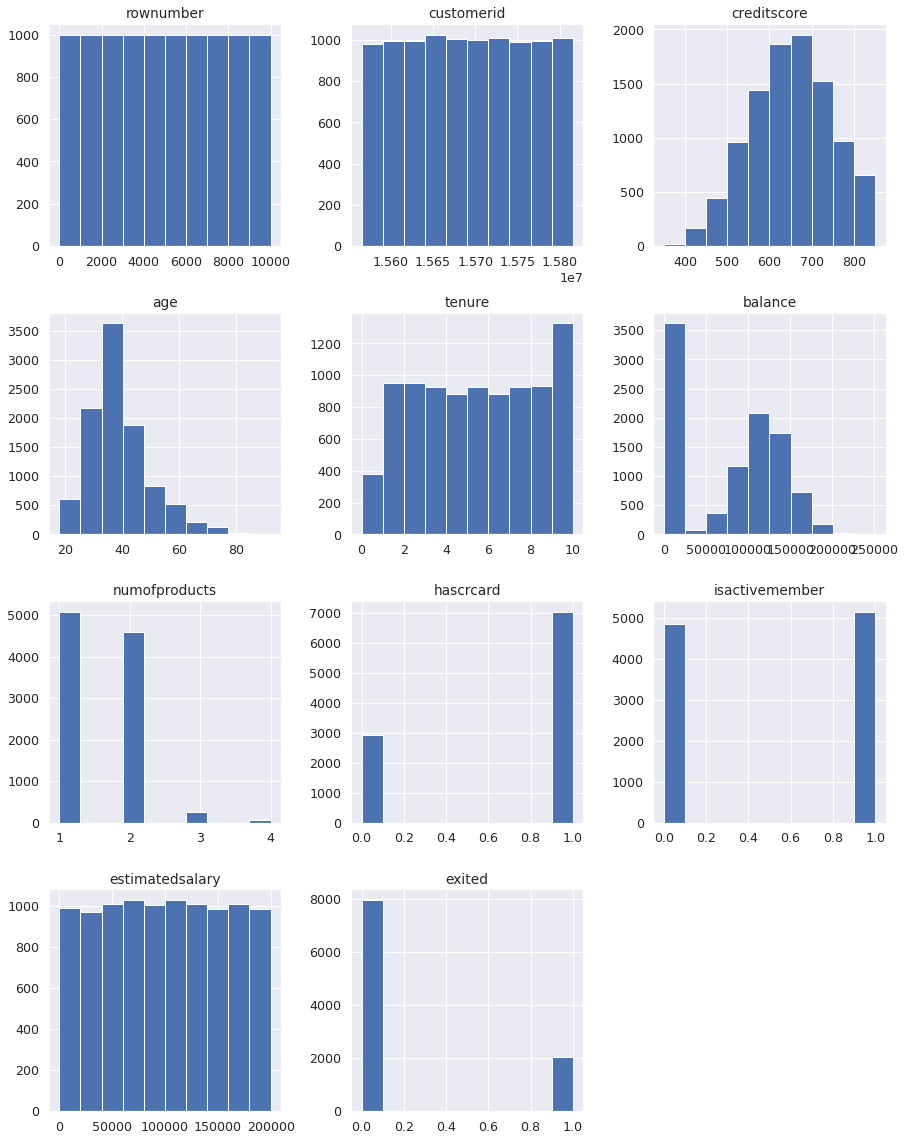

In [307]:
df.hist(figsize=(15, 20));

In [308]:
# заполним пропуски в tenure медианой 
# df['tenure'] = df['tenure'].fillna(value=5.0)

In [309]:
import random
# df['tenure'].fillna(lambda x: random.choice(df[df['tenure'] != np.nan]['tenure']), inplace =True)
# df['tenure'].fillna(random.choice(df['tenure'][df['tenure'].notna()]), inplace=True
# df['tenure'].fillna(random.choice(df['tenure'][df['tenure'].notna()]), inplace=True)

In [310]:
# заполним пропуски случайным значением в диапазоне 
df['tenure'] = df['tenure'].fillna(pd.Series(np.random.randint(1, 11, size=len(df['tenure'].isna()))))

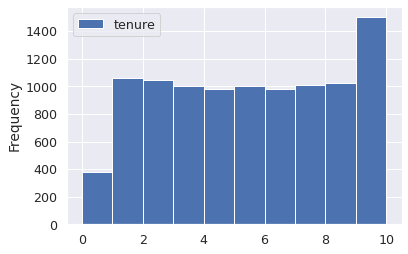

In [312]:
df.plot(kind='hist', y='tenure', bins=10, grid=True, legend=True);

In [313]:
# tenure к целочисленному типу, т.к. видно, что дробных значений не принимает
# (вероятно округлен до года)
df['tenure'] = df['tenure'].astype('int')

In [314]:
# проверим, что все пропуски заполнены
print(df['tenure'].isna().sum())

0


In [315]:
# удалим бесполезные для модели столбцы 
df = df.drop(columns=['rownumber', 'customerid', 'surname']) 

In [316]:
display(df.sample(10))

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6186,618,France,Male,37,5,0.00,1,0,1,178705.45,1
1290,653,Germany,Male,31,9,143321.97,1,1,0,83679.46,0
1468,691,France,Male,52,3,0.00,1,1,0,175843.68,1
3722,619,France,Male,25,4,0.00,1,1,0,145524.36,0
4239,636,France,Female,39,3,118336.14,1,1,0,184691.77,0
2622,627,Germany,Male,27,0,185267.45,2,1,1,77027.34,0
8473,770,France,Female,33,6,0.00,2,1,1,126131.90,0
3513,790,France,Female,33,10,135120.72,1,0,0,195204.99,0
5918,600,Germany,Male,28,2,116623.31,1,0,1,59905.29,0
980,594,France,Male,27,0,197041.80,1,0,0,151912.49,0


<AxesSubplot:>

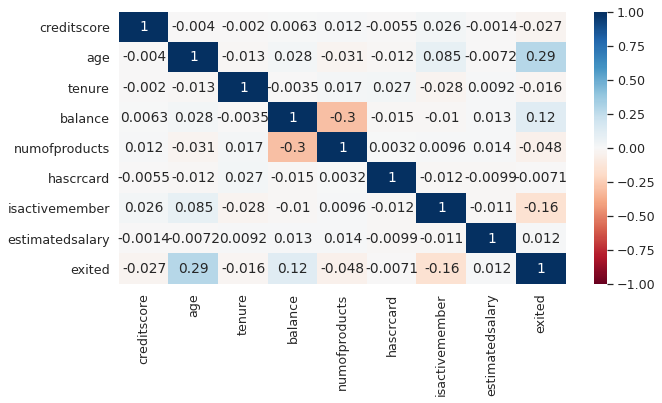

In [317]:
# проверим нет ли корреляций между параметрами
sns.set(font_scale=1.15)
plt.figure(figsize=(10,5))
sns.heatmap(
    df.corr(),        
    cmap='RdBu', 
    annot=True, 
    vmin=-1, vmax=1)

Слабая отрицательная корреляция м-ду balance и numofproduct: -0.3, чем больше денег, тем меньше продуктов исопльзуется (вероятно, отпадают кредитные продукты). У 36% клиентов на балансе 0, а продукты какие-то могут быть, по всей очевидности это вносит большой вклад в отрицательную корреляцияю.
<br><br>
Слабая положительная м-ду age и exited: 0.29, чем дольше живещь, тем больше банков попробуешь. Это не проблема т.к. это целевой параметр и параметр.

## Исследование задачи

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Чтобы не было утечки данных, масштабирование необходимо делать после разделения df на обучающую, валидационную и тестовую выборки. Функцию масштабирования обучать на обучающих признаках и применять к остальным. 
<br><br> 

In [319]:
# перекодирование данных методом OHE, избегая ловушки дамми-переменных

df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)


In [320]:
# разобьем df на обучающую выборку и временную, которую затем разобъем на валидационную и тестовую
# в пропорции (60%, 20% и 20%, соответственно)
features_train, features_split, target_train, target_split = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(features_split, target_split, test_size=0.5, random_state=12345, stratify=target_split)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [321]:
# масштабирование
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_valid.head())

/tmp/ipykernel_31/1077688093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/1077688093.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
6612,-1.524838,2.383160,-0.708733,1.011655,-0.914708,0,1,0.010275,0,0,0
519,0.587990,1.811221,0.328690,0.213192,-0.914708,0,1,0.453089,0,0,1
1609,-0.318980,-0.381213,1.020306,0.893896,-0.914708,1,0,-0.603508,0,0,0
3475,1.226991,-0.762506,-0.362925,-0.240363,0.820981,1,1,-1.621460,0,0,1
2707,-0.133464,-0.095244,-0.708733,0.447305,-0.914708,0,0,0.338574,0,0,0


<AxesSubplot:>

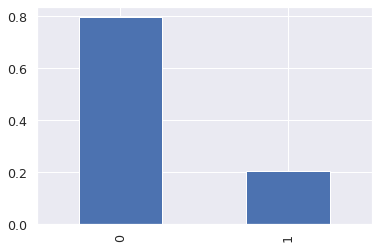

In [322]:
# посмотрим какая доля ушедших клиентов в итоге осталась в обучающей выборке
# в четыре раза меньше тех кто остался
class_frequency = target_train.value_counts(normalize=True)
class_frequency.plot(kind='bar')

<AxesSubplot:>

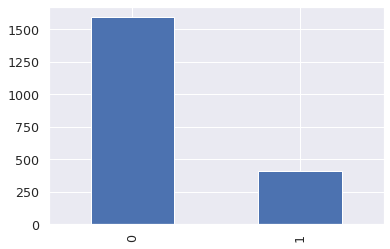

In [323]:
class_frequency = target_valid.value_counts()
class_frequency.plot(kind='bar')

In [324]:
# Посмотрим на F1 логистической модели без учеты баланса классов

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 логистической регрессии без учеты баланса классов:", f1_score(target_valid, predicted_valid))

F1 логистической регрессии без учеты баланса классов: 0.3076923076923077


In [325]:
# Посмотрим на ROC_AUC логистической модели без учеты баланса классов 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC логистической регрессии без учеты баланса классов на валидационной выборке:", auc_roc)

ROC-AUC логистической регрессии без учеты баланса классов на валидационной выборке: 0.7874205586757316


## Борьба с дисбалансом

Выясним какой метод борьбы с дисбалансом классов, взвешивание классов или upsampling, лучше подходит, проверив результаты того и другого с помощью сравнение метрик F1 логистической регрессии в первом и во втором случае.

### Борьба с дисбалансом путем взвешивания классов 

In [326]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5285338015803336


### Борьба с дисбалансом путем upsampling-а 

In [327]:
# функция upsampler

def upsample(features, target, repeat):    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    repeat = repeat
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # соединение таблиц
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) # соединение таблиц
    return shuffle(features_upsampled, target_upsampled, random_state = 12345) # перемешали
    

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)# в 4 раза необходимо увеличить

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5246753246753246


In [328]:
# Посмотрим на F1 логистической модели без учеты баланса классов

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3076923076923077


В качестве средства борьбы с дисбалансом взвешивание классов показывает более высокий результат (f1 логистической регрессии на валидационной выборке - 0.529), чем upsampling (при увеличении редкого класса в 4 раза f1 логистической регрессии на валидационной выборке - 0.525).
<br><br>
Без учета баланса классов f1 логистической регрессии на валидационной выборке - 0.308. Т.е. балансировка классов очень важна и существенно сказывается на величине максимизируемой метрики качества модели. 

### Выбор лучшей модели

In [329]:
# Модель случайного леса

best_model = None
best_result = 0.5
best_est = 0
best_depth = 0
#модель будет с количеством деревьев: от 10 до 100 с шагом 10
for est in range(10, 101, 10):
    # деревья будут с максимальной глубиной от 1 до 10
    for depth in range (1, 11):
        # инициализируйте модель RandomForestClassifier с параметрами random_state=12345, n_estimators=est и max_depth=depth
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train) # обучите модель на обучающей выборке
        predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке
        # Для каждой модели посчитаk RMSE на валидационной выборке
        result = f1_score(target_valid, predictions_valid)# посчитайте значение метрики rmse на валидационной выборке
        # Лучшая модель с максимальной accuracy
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

F1 на валидационной выборке: 0.6509009009009008 Количество деревьев: 60 Максимальная глубина: 10


In [330]:
best_model = None
best_result = 0.5
best_depth = 0

    # максимальная глубина от 1 до 10
for depth in range (1, 11):
    # инициализируйте модель RandomForestClassifier с параметрами random_state=12345, n_estimators=est и max_depth=depth
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    model.fit(features_train, target_train) # обучите модель на обучающей выборке
    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке
    # Для каждой модели посчитаk RMSE на валидационной выборке
    result = f1_score(target_valid, predictions_valid)# посчитайте значение метрики rmse на валидационной выборке
    # Лучшая модель с максимальной accuracy
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print("F1 на валидационной выборке:", best_result, "Максимальная глубина:", depth)

F1 на валидационной выборке: 0.5748613678373382 Максимальная глубина: 10


Наиболее высокую f1 на валидационной выборке (0.65) дает модель случайного леса с количеством деревьев: 30 и максимальной глубиной: 10, а также повышением веса редкого класса. 

### ROC-AUC

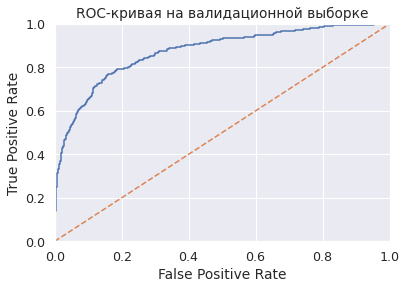

In [331]:
# построим ROC-кривую
from sklearn.metrics import roc_curve

model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=10)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)# < напишите код здесь >

plt.figure()

# < постройте график >
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая) - диагональ
plt.plot([0, 1], [0, 1], linestyle='--')

# < примените функции plt.xlim() и plt.ylim(), чтобы
#   установить границы осей от 0 до 1 >
plt.xlim(0, 1)
plt.ylim(0, 1)

# < примените функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая на валидационной выборке')
plt.show()

In [332]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC лучшей модели на валидационной выборке:", auc_roc)

ROC-AUC лучшей модели на валидационной выборке: 0.8728030470982363


ROC-AUC лучшей модели на валидационной выборке (0.87) заметно выше f1 лучшей модели на валидационной выборке (0.65). 

В чате советовали не использовать кроссвалидацию и GridSearchCV вместе с балансировкой классов. Можно попробовать с uppsampling-ом. (Не работает, может, scorer для f1 неверно пишу?)

## Тестирование модели

In [336]:
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)
f1_test = f1_score(target_test, test_predictions)
f1_train = f1_score(target_train, model.predict(features_train))

print("F1 лучшей модели на тестовой выборке:", f1_test)
print("F1 лучшей модели на обучающей выборке:", f1_train)



F1 лучшей модели на тестовой выборке: 0.5885225885225884
F1 лучшей модели на обучающей выборке: 0.8060174188440221


Модель переобучена, т.к. f1 на обучающей выборке заметно выше, чем на тестовой.

In [337]:
# посмотрим на ROC-AUC модели на тестовой выборке

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
print("ROC-AUC лучшей модели на тестовой выборке:", auc_roc_test)

ROC-AUC лучшей модели на тестовой выборке: 0.8467327111394908


ROC-AUC лучшей модели на тестовой выборке (0.86) не намного ниже, чем на валидационной (0.87)

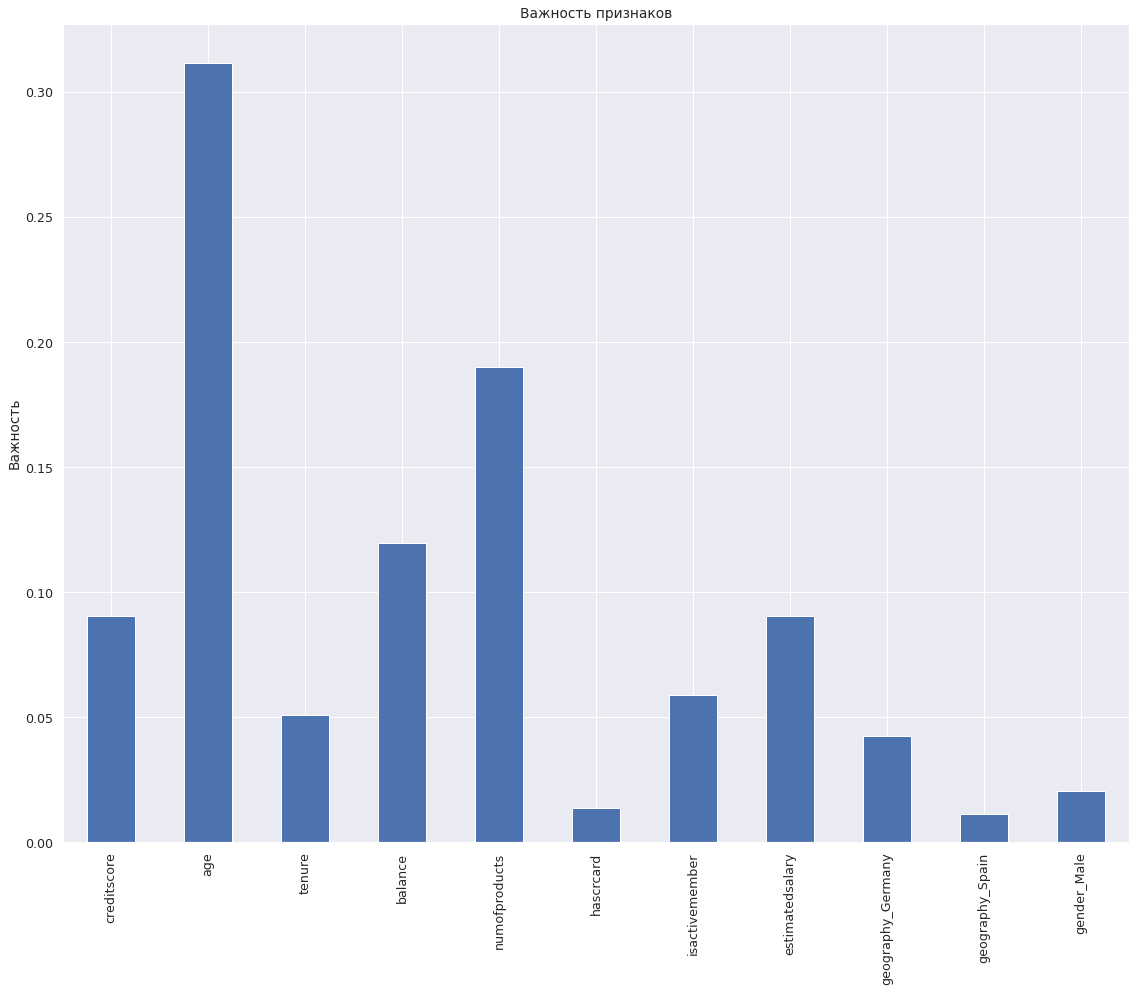

In [339]:
f_imp = pd.Series(model.feature_importances_, features.columns)

fig, ax = plt.subplots(figsize=(16,14))
f_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()